In [1]:
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import for Colab

In [2]:
def task1_image_manipulation(image_path):
    # 1. Read the image
    image_bgr = cv2.imread(image_path)

    # 2. Display the image (Using cv2_imshow for Colab)
    cv2_imshow(image_bgr)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    cv2.imwrite('image_rgb.jpg', image_rgb)

    # 3. Extract Image Size
    height, width, channels = image_rgb.shape
    print(f'Image Dimensions: {width}x{height}, Channels: {channels}')

    # 4. Calculate Image Pixels
    total_pixels = height * width
    print(f'Total Pixels: {total_pixels}')

    # 5. Convert RGB to Grayscale
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    cv2.imwrite('image_gray.jpg', gray_image)
    cv2_imshow(gray_image)  # Display grayscale image

    # 6. Convert to Binary Image using Thresholding
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite('image_binary.jpg', binary_image)
    cv2_imshow(binary_image)  # Display binary image

    # Count black pixels
    black_pixel_count = np.sum(binary_image == 0)
    print(f'Black Pixel Count: {black_pixel_count}')

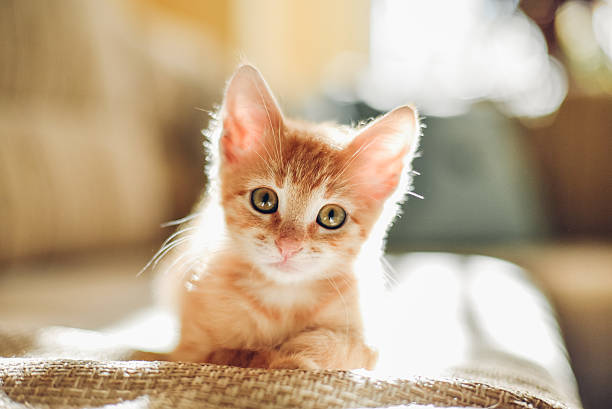

Image Dimensions: 612x409, Channels: 3
Total Pixels: 250308


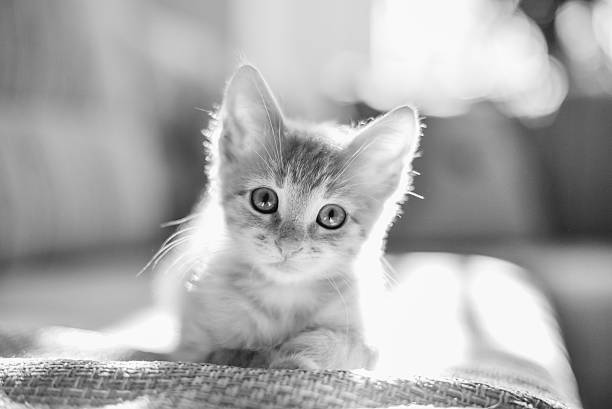

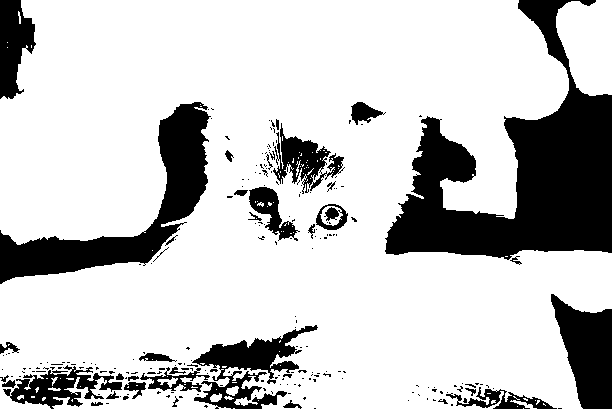

Black Pixel Count: 55178


In [3]:
if __name__ == "__main__":
    image_path = '/content/cat_image.jpg'
    task1_image_manipulation(image_path)

In [4]:
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from skimage.filters import sobel, prewitt, roberts
from skimage.segmentation import watershed
from scipy import ndimage
from google.colab.patches import cv2_imshow

In [15]:
def task2_edge_segmentation(image_path):
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Edge Detection
    sobel_edges = sobel(image_gray)
    prewitt_edges = prewitt(image_gray)
    roberts_edges = roberts(image_gray)
    canny_edges = cv2.Canny(image_gray, 100, 200)

    cv2.imwrite('sobel_edges.jpg', sobel_edges * 255)
    cv2.imwrite('prewitt_edges.jpg', prewitt_edges * 255)
    cv2.imwrite('roberts_edges.jpg', roberts_edges * 255)
    cv2.imwrite('canny_edges.jpg', canny_edges)

    print("Sobel Edge Detection:")
    cv2_imshow(sobel_edges * 255)
    print("Prewitt Edge Detection:")
    cv2_imshow(prewitt_edges * 255)
    print("Roberts Edge Detection:")
    cv2_imshow(roberts_edges * 255)
    print("Canny Edge Detection:")
    cv2_imshow(canny_edges)

    # Image Segmentation
    _, global_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)
    adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)



    cv2.imwrite('global_thresh.jpg', global_thresh)
    cv2.imwrite('adaptive_thresh.jpg', adaptive_thresh)

    print("Global Thresholding:")
    cv2_imshow(global_thresh)
    print("Adaptive Thresholding:")
    cv2_imshow(adaptive_thresh)


Sobel Edge Detection:


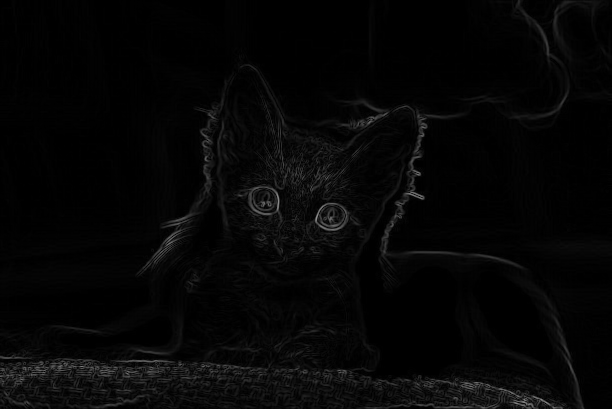

Prewitt Edge Detection:


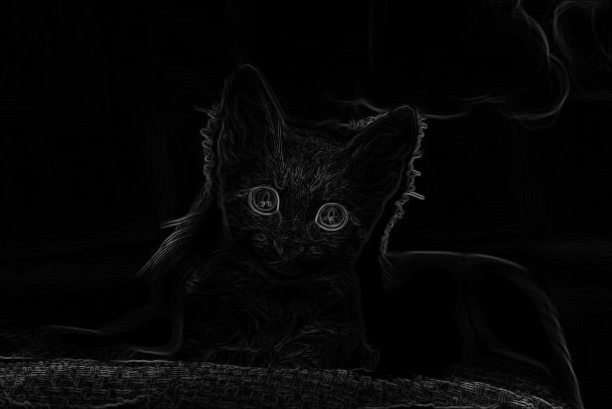

Roberts Edge Detection:


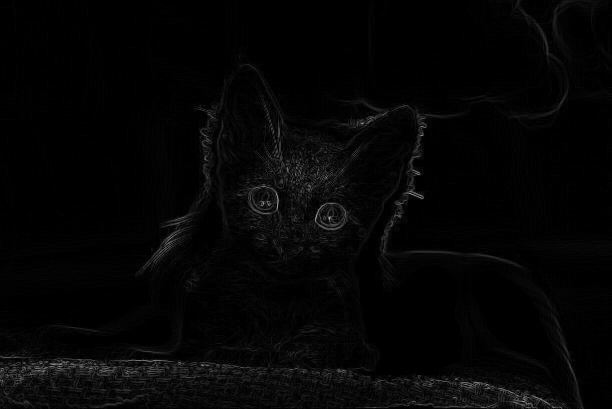

Canny Edge Detection:


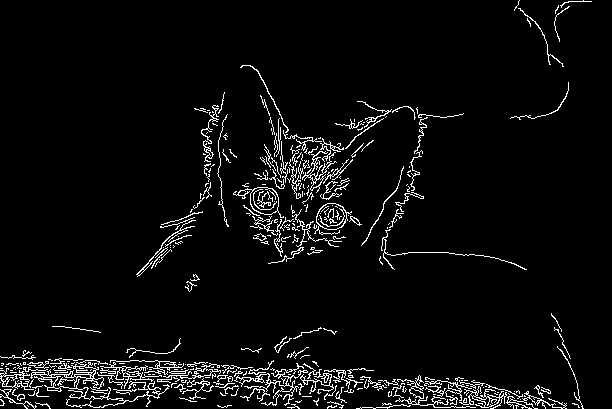

Global Thresholding:


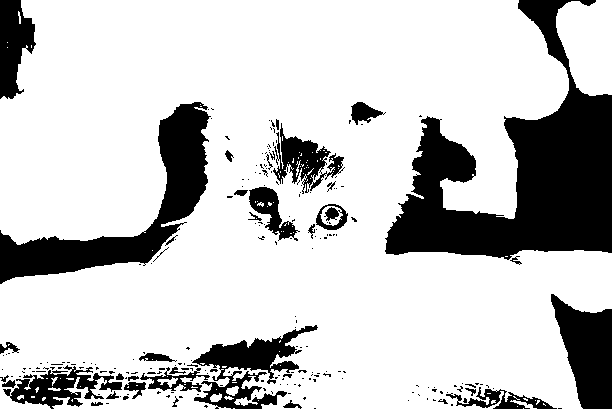

Adaptive Thresholding:


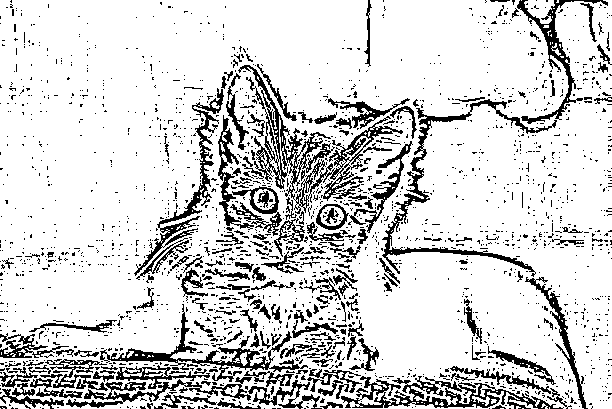

In [16]:
if __name__ == "__main__":
    image_path = '/content/cat_image.jpg'
    task2_edge_segmentation(image_path)

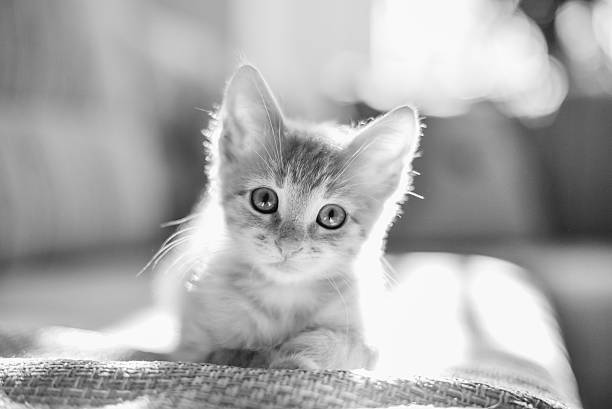

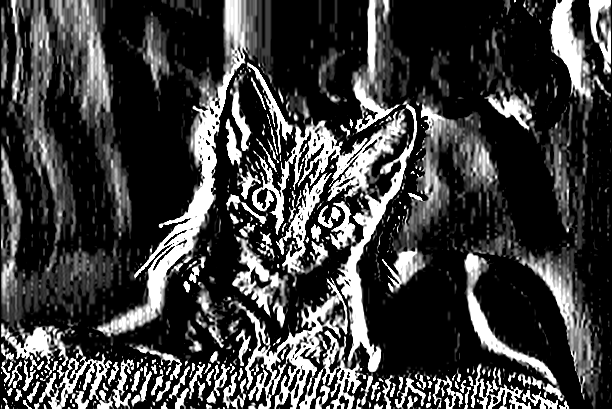

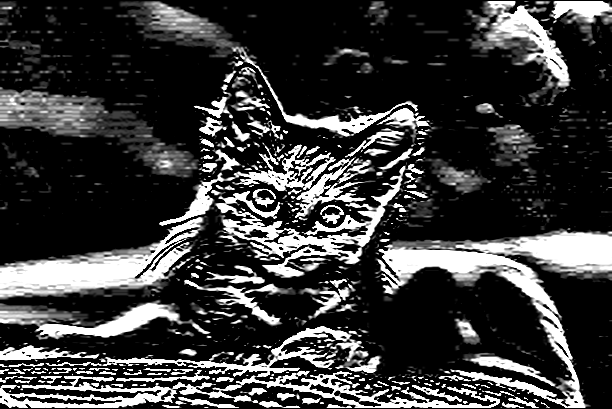

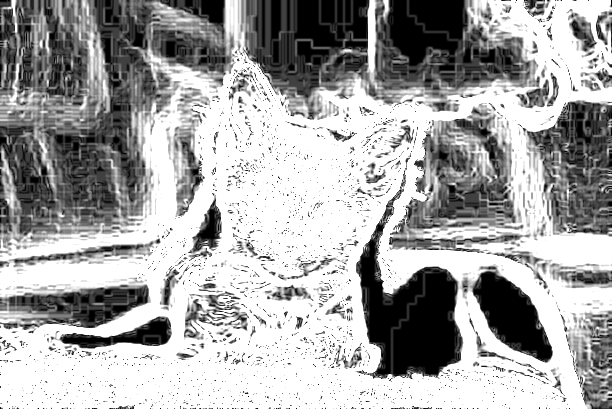

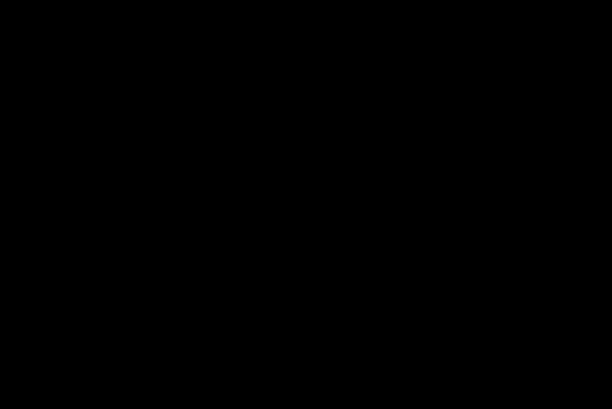

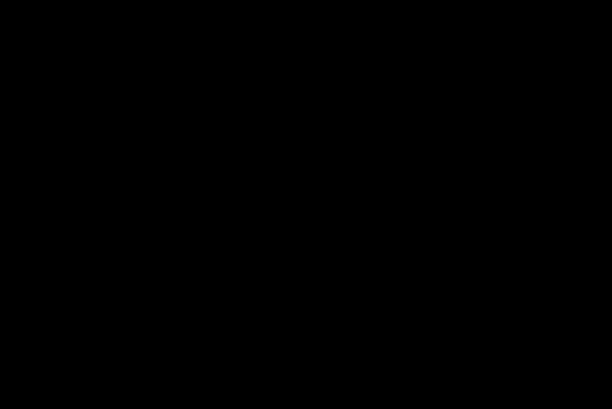

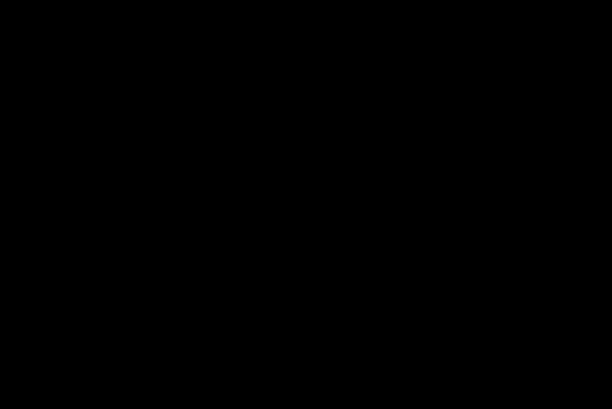

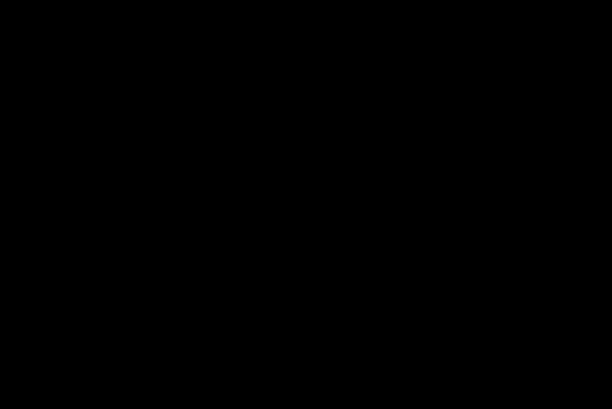

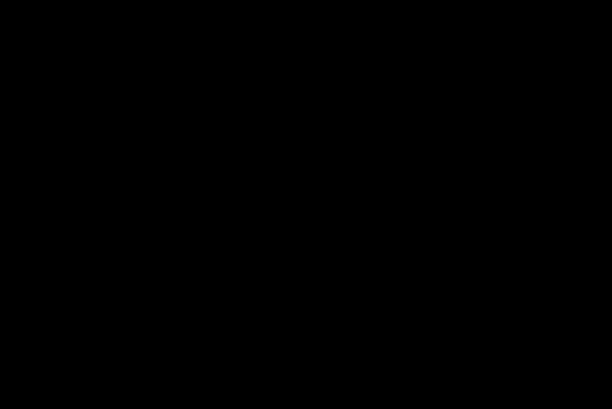

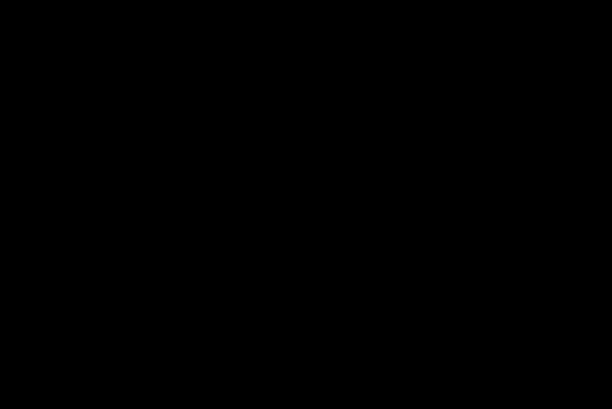

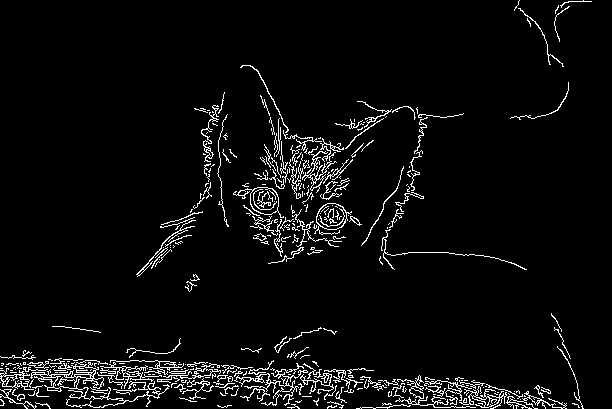

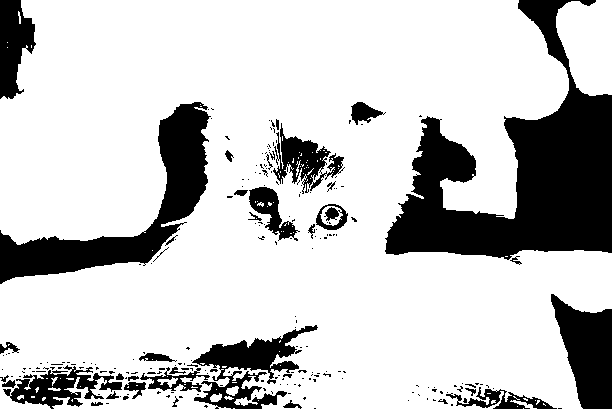

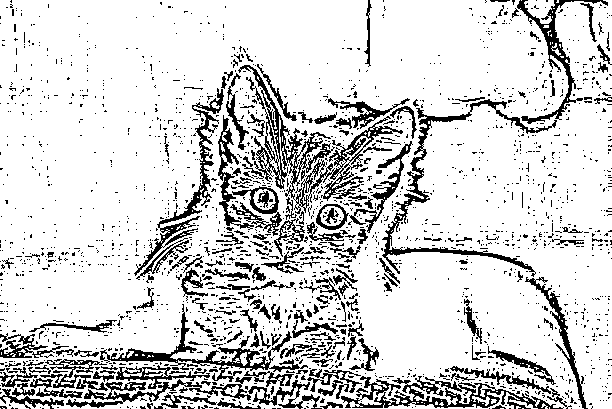

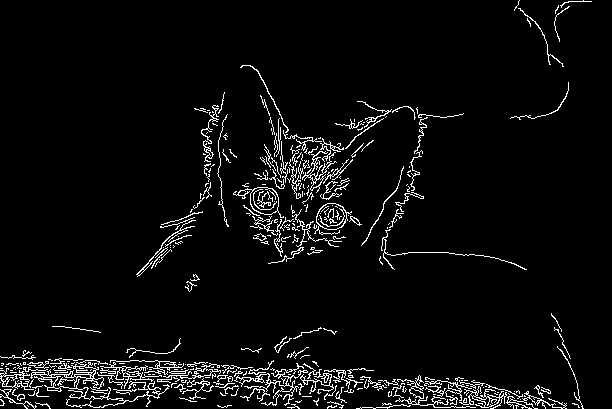

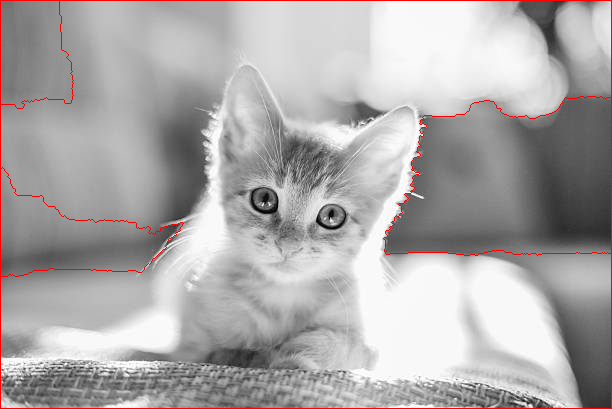

In [24]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import filters
import matplotlib.pyplot as plt
image = cv2.imread('/content/cat_image.jpg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

cv2_imshow(sobel_x)
cv2_imshow(sobel_y)
cv2_imshow(sobel_combined)

prewitt_x = filters.prewitt_h(image)
prewitt_y = filters.prewitt_v(image)
prewitt_combined = np.hypot(prewitt_x, prewitt_y)


cv2_imshow(prewitt_x)
cv2_imshow(prewitt_y)
cv2_imshow(prewitt_combined)

roberts_x = filters.roberts_pos_diag(image)
roberts_y = filters.roberts_neg_diag(image)
roberts_combined = np.hypot(roberts_x, roberts_y)

cv2_imshow(roberts_x)
cv2_imshow(roberts_y)
cv2_imshow(roberts_combined)

canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

cv2_imshow(canny_edges)

_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(global_thresh)

adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2_imshow(adaptive_thresh)

cv2_imshow(canny_edges)

_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]

cv2_imshow(image_color)